# Playing with Poisson probabilities

Created by [Christopher Berry](https://git.ligo.org/christopher-berry/playing-with-poissons).

## Bookkeeping

Setting up modules and plotting styles

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as clr
%matplotlib inline

In [2]:
rc_params = {'backend': 'ps',
             'axes.labelsize': 22,
             'axes.titlesize': 22,
             'font.size': 20,
             'legend.fontsize': 20,
             'xtick.labelsize': 20,
             'ytick.labelsize': 20,
             'text.usetex': True,
             'text.latex.preamble': r"\usepackage{amsmath}",
             'font.serif': ['Computer Modern', 'Times New Roman'],
             'font.family': ['serif', 'STIXGeneral'],
             'legend.frameon': False,
             'xtick.top': True,
             'ytick.right': True,
             'savefig.bbox': 'tight'}

         
plt.rcParams.update(rc_params)

# Calculating probabilities

Assume that we have [Poisson distributed](https://en.wikipedia.org/wiki/Poisson_distribution) events with mean rate $\Lambda$. The probability that two events are sepearted by a time $t \geq T_\mathrm{wait}$ is given by an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)

\begin{equation}
P(t \geq T_\mathrm{wait}|\Lambda) = \exp(-\Lambda T_\mathrm{wait}).
\label{eq:delay}
\tag{1}
\end{equation}

As $T_\mathrm{wait} \rightarrow 0$, this tends to $1$, and as $T_\mathrm{wait} \rightarrow \infty$ this tends to $0$, as would be expected.

The probability of waiting a time  $t < T_\mathrm{wait}$ is given by the complement of Eq. \eqref{eq:delay},

\begin{equation}
P(t < T_\mathrm{wait}|\Lambda) = 1- \exp(-\Lambda T_\mathrm{wait}).
\tag{2}
\end{equation}

If we consider $N$ events drawn from our Poisson process, then the probability that all of them are separated by a time $t \geq T_\mathrm{wait}$ is

\begin{equation}
P(N: t \geq T_\mathrm{wait}|\Lambda) = P(t \geq T_\mathrm{wait}|\Lambda)^N = \exp(-N \Lambda T_\mathrm{wait}).
\label{eq:N-delay}
\tag{3}
\end{equation}

The probability that \emph{at least} one of the events is separated by $t < T_\mathrm{wait}$ is the complement of this

\begin{equation}
P(> 1: t < T_\mathrm{wait}|\Lambda) = 1 - P(N: t \geq T_\mathrm{wait}|\Lambda) = 1 - \exp(-N \Lambda T_\mathrm{wait}).
\tag{4}
\end{equation}

Hence, using this we can estimate the probability of having two gravitational wave canddiates separated by a small space of time.

In [3]:
# Probability of waiting less than T_wait for at least one event out of N_events
def calculate_probability(Lambda_rate, T_wait, N_events):
    # Probability of waiting longer than T_wait between Poisson distrubted events with rate Lambda
    Prob_wait = np.exp(-Lambda_rate*T_wait)

    # Probability of waiting longer than T_wait for N_events events
    Prob_N = (Prob_wait)**N_events

    # Probability of waiting less than T_wait at least once
    Prob_total = 1.0 - Prob_N
    
    return Prob_total

## O3 events

Let us consider the LIGO and Virgo's third oberving run (O3) from its start on 1 Apri 2019 to 1 September 2019. Over this period, [25 gravitational-wave candidates have been anounced](https://gracedb.ligo.org/latest/) (excluding those retracted). For our purposes, it is sufficient to consider candidates, regardless of whether or not they are real gravitational waves, as candidates should stil be Poisson distributed: the sum of Poisson distributions is also Poisson, so we can have a mix of false alarms, signals from binary neutron stars, signals from binary black holes and signals from neutron star&ndash;black holes and still end up with a nice distribution.

In [4]:
# Number of events in O3
N_O3 = 25

# Calendar time of O3 (in seconds)
T_cal = 153*24*60*60

We will assume that the [sensitivity of the detectors](https://www.gw-openscience.org/detector_status/) is approximately constant over time. The individual detectors have been stable, although the sensitivity of the network will change depending upon which detectors are online.

A complication in considering rates is the duty cycle of our detectors. They are not always online, so claendar time is not the same as observing time. We wil both consider different dtuy cycles to investigate the significance of this, and simply work in tersm of calendar time.

In [5]:
#Consider a range of duty factors
duty_factor = np.linspace(0.1,1,100)

Given $N_\mathrm{O3}$ in time $T$, the maximum likelihood estimate for the rate is $\Lambda_\mathrm{ML} = N_\mathrm{O3}/T$. We could add in a prior and calculate the posterior expectation value, but let's keep things simple for now.

In [6]:
# Estimate for average rate = number of events / observing time
Lambda_ML = N_O3 / (duty_factor * T_cal)

During the first few months of O3, we had a pair of event candidates [S190828j](https://gracedb.ligo.org/superevents/S190828j/view/) and [S190828k](https://gracedb.ligo.org/superevents/S190828l/view/) separated only by 21 minutes. We will be interested in the probability of two events being so close.

In [7]:
# Time between events (21 minutes)
T_interval = 21 * 60

In [8]:
# Probability of waiting less than T_wait at least once during O3 so far
Prob_O3 = calculate_probability(Lambda_ML, T_interval, N_O3)

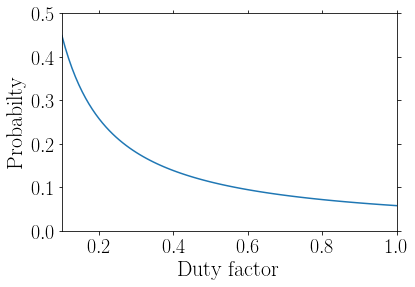

In [9]:
# Make plot as a function of duty factor
plt.plot(duty_factor, Prob_O3)
plt.ylim([0,0.5])
plt.xlim([0.1,1])
plt.xlabel('Duty factor')
plt.ylabel('Probabilty')
plt.show()

As the duty factor goes down, the probability goes up, as we must have more events in a shorter period of time. Hence the probability of seeing tow events in a short time, like 21 minutes, is higher. The duty factor has been about 80% in O3.

## Varying the event rate

Instead of using the same set of events to estimate rates and to examine the spacing between, let us know look at a range of different rates.

In [10]:
# Instead of estimating rate from O3 data (which ends up double counting information) let's put it in a priori
# Estimating the rate per week
Lambda_week = np.logspace(-1,1,200)

In [11]:
# Probability of waiting less than T_wait at least once during O3 so far
Prob_O3_week = calculate_probability(Lambda_week/(7*24*60*60), T_interval, N_O3)

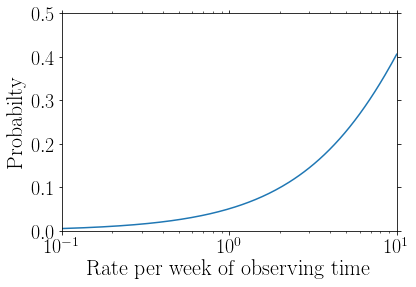

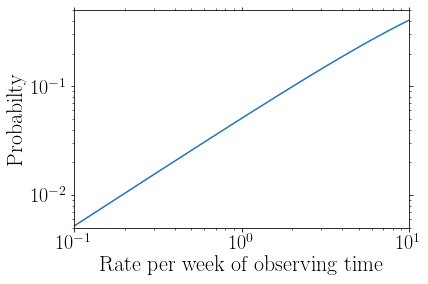

In [12]:
# Make plots in terms of Poisson rate
plt.semilogx(Lambda_week, Prob_O3_week)
plt.ylim([0,0.5])
plt.xlim([0.1,10])
plt.xlabel('Rate per week of observing time')
plt.ylabel('Probabilty')
plt.show()

plt.loglog(Lambda_week, Prob_O3_week)
plt.ylim([0.005,0.5])
plt.xlim([0.1,10])
plt.xlabel('Rate per week of observing time')
plt.ylabel('Probabilty')
plt.show()

As the rate goes up, we again see that the probability of seeing two in a small time goes up. This is as expected. For about 1 event per week, we are slightly below a 10% probability.

## Changing the number of events 

Let us investigate how the probability changes after more events. The more events we get, the more likely at least one pair has a small spearation.

In [13]:
# Not let's see how things vary with the number of events
N_max = 100
N_range = range(1,N_max+1,1)
Prob_Lambda_N = np.zeros((N_max,np.size(Lambda_week)))

In [14]:
# Probability of waiting less than T_wait at least once during O3 so far
for n_event in N_range:
    Prob_Lambda_N[n_event-1,:] = calculate_probability(Lambda_week/(7*24*60*60), T_interval, n_event)

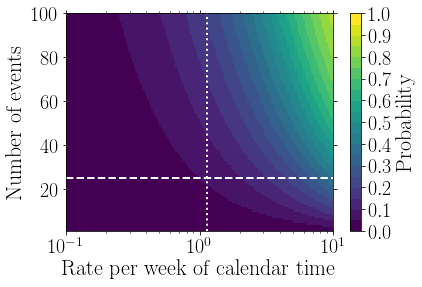

In [15]:
# Make a 2D plot
cmap = plt.get_cmap('viridis')
norm = clr.BoundaryNorm(np.linspace(0, 1, 21), ncolors=cmap.N, clip=True)

plt.pcolor(Lambda_week, N_range, Prob_Lambda_N, cmap=cmap, norm=norm)
plt.xlabel('Rate per week of calendar time')
plt.xscale('log')
plt.ylabel('Number of events')
cb = plt.colorbar(ticks=np.linspace(0,1,11))
cb.set_label('Probability')

# Add line for number of events in O3
plt.plot(Lambda_week, N_O3*np.ones(np.shape(Lambda_week)), 'w--', linewidth=2)

# Add line for maximum likelihood rate, working in calendar time (which is equivalent to observing time if the duty factor is 1)
plt.plot(Lambda_ML[-1]*(7*24*60*60)*np.ones(np.shape(N_range)), N_range, 'w:', linewidth=2)

plt.savefig('Fig_21min.png')
plt.show()

As we've seen above, increasing the event rate boosts the probability. We also see that as the number of events goes up, the probability goes up too.

The dashed line marks $N_\mathrm{O3}$ and the dotted line marks $\Lambda_\mathrm{ML}$ (working in terms of calendar time rather than just observing time). Let's calculat the probability of the point these two lines meet.

In [16]:
# Probability where the lines meet
prob_ML = calculate_probability(Lambda_ML[-1], T_interval, N_O3)
print('Probability for O3 (April-September 2019):', prob_ML)

Probability for O3 (April-September 2019): 0.057832719560774515
